# FFT Development

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (2e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (2, 1, 1)  # discretisation

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
A=1e-12  # Exchange
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='twospin')
system.energy = mm.Zeeman(H=H) + mm.Exchange(A=A)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (DockerOOMMFRunner) [2021/08/23 14:03]... (6.5 s)


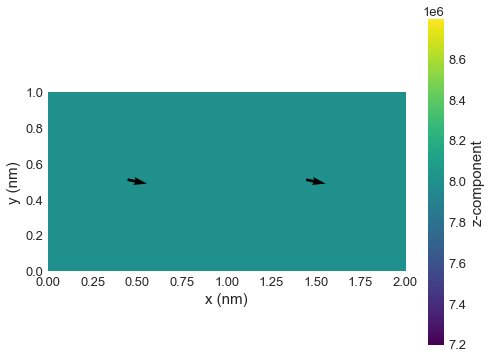

In [3]:
system.m.plane('z').mpl()

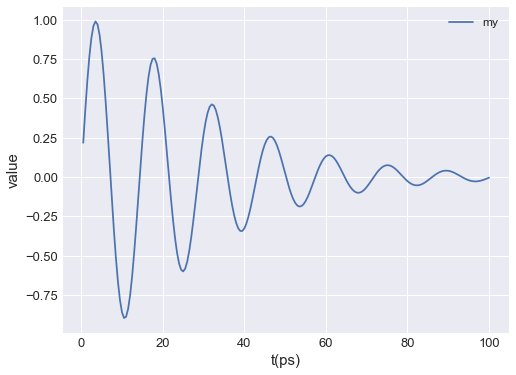

In [6]:
system.table.mpl(y=['my'])

In [5]:
import micromagneticdata as md
import numpy as np
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

In [7]:
drive = md.Drive(name='twospin', number=1)

In [13]:
drive.

'twospin'

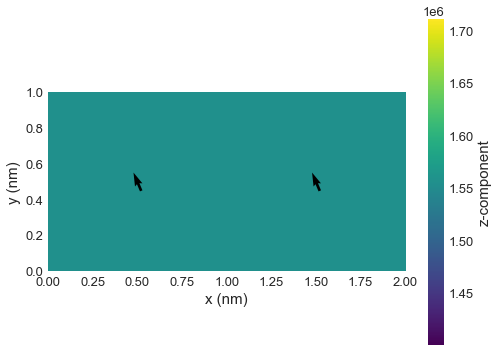

In [8]:
drive[8].plane('z').mpl()

In [214]:
drive.x

't'

In [115]:
def rfft(drive):
    freqs = np.fft.rfftfreq(drive.table.data[drive.x].size, drive.table.dx)
    tot = []
    for i in np.arange(drive.n):
        tot.append(drive[i].array)
    f = np.fft.rfft(tot, axis=0)
    f_field = []
    for i in np.arange(f.shape[0]):
        f_field.append(df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]))
    return freqs, f_field

In [220]:
freqs, out = rfft(drive)

The format which would be good would be a like discretised field time class.
Would be good to have the independent variable (i.e. 't') saved and also be able to apply functions to each member of the list.

In [222]:
f_field_ave = []
for i in np.arange(f.shape[0]):
    f_field_ave.append(f_field[i].average)

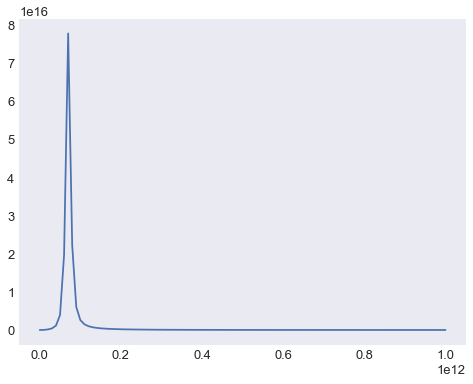

In [228]:
plt.plot(freqs, (np.abs(f_field_ave)**2)[:,0])

In [179]:
f_field = []
for i in np.arange(f.shape[0]):
    f_field.append(df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]))

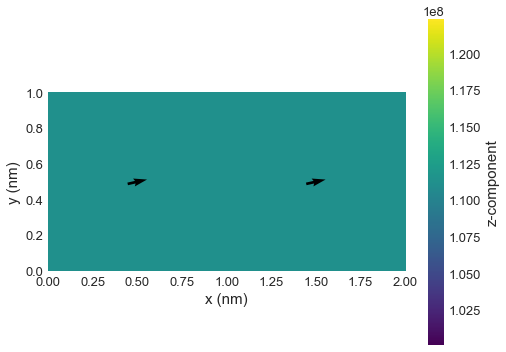

In [192]:
f_field[2].plane('z').imag.mpl()

In [200]:
f_field_ave = []
for i in np.arange(f.shape[0]):
    f_field_ave.append(f_field[i].average)

In [206]:
psd = np.abs(f_field_ave)**2

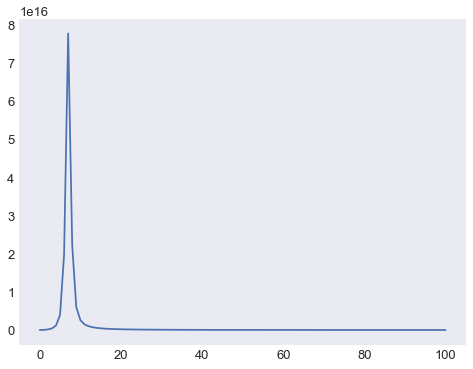

In [209]:
plt.plot(psd[:,0])

In [177]:
f_sum = f.sum(axis=(1,2,3))

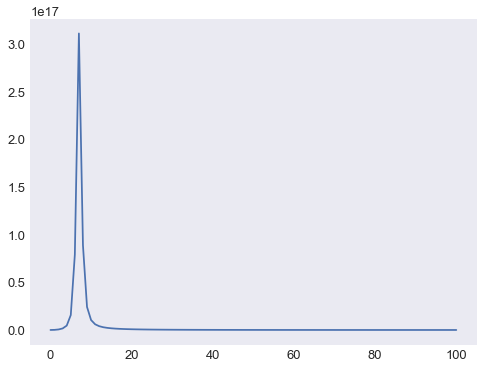

In [178]:
plt.plot(np.abs(f_sum[:,0])**2)

# Standard problem

In [44]:
region = df.Region(p1=(0, 0, 0), p2=(120e-9, 120e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

In [45]:
Ms = 800e3
A = 1.3e-11
gyro = 2.210173e5
damp = 0.008
H_mag = 80e3
H_relax = H_mag * np.array([1, 0.715, 0]) / np.linalg.norm([1, 0.715, 0])
H_dyn = H_mag * np.array([1, 0.7, 0]) / np.linalg.norm([1, 0.7, 0])

In [46]:
field = df.Field(mesh=mesh, dim=3, value=(0,0,1), norm=Ms)

C:\Users\samjr_ym2i32\.conda\envs\ubermagdev\lib\site-packages\matplotlib\quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\samjr_ym2i32\.conda\envs\ubermagdev\lib\site-packages\matplotlib\quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


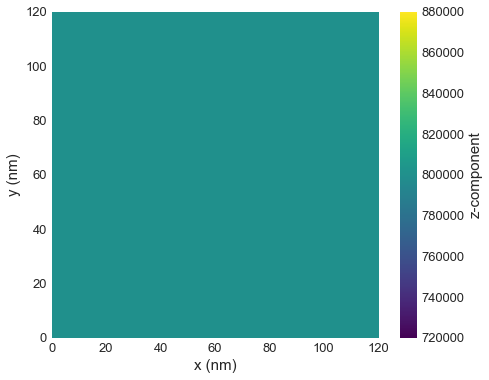

In [47]:
system = mm.System(name='standard_problem')
system.energy = (mm.Exchange(A=A) + 
                 mm.Zeeman(H=H_relax) +
                 mm.Demag())
system.dynamics = mm.Precession(gamma0=gyro) + mm.Damping(alpha=damp)
system.m = field

system.m.plane('z').mpl()

In [48]:
md = mc.MinDriver()
md.drive(system)

Running OOMMF (DockerOOMMFRunner) [2021/08/23 10:29]... (5.0 s)


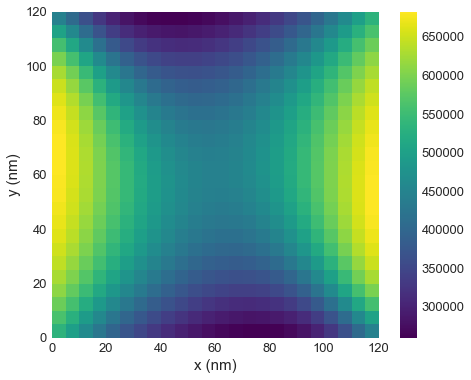

In [49]:
system.m.y.plane('z').mpl()

Dynamics

In [50]:
system.energy.zeeman.H = H_dyn

In [51]:
td = mc.TimeDriver()
td.drive(system, t=20e-9, n=4000)

Running OOMMF (DockerOOMMFRunner) [2021/08/23 10:30]... (264.4 s)


Global

In [55]:
import matplotlib.pyplot as plt

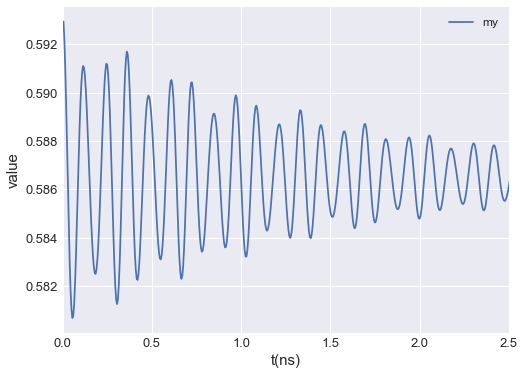

In [58]:
system.table.mpl(y=['my'], xlim=[0, 2.5e-9])

In [1]:
import micromagneticdata as mic_d
import numpy as np

In [2]:
drive = mic_d.Drive(name='standard_problem', number=3)

In [13]:
s_table = drive.table

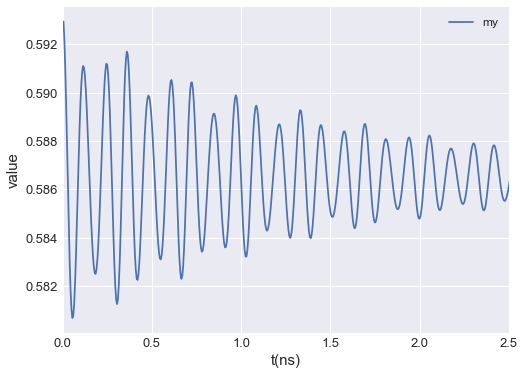

In [14]:
s_table.mpl(y=['my'], xlim=[0,2.5e-9])

In [15]:
ft_table = s_table.rfft(y=['mx', 'my'])

In [60]:
import matplotlib.pyplot as plt
import ubermagtable as ut

In [68]:
ft_table.apply(lambda x: np.abs(x)**2).data.iloc

In [69]:
def trial(a):
    print(a)

In [74]:
trial(range(1))

range(0, 1)


In [61]:
new_table = ut.Table(data=ft_table.apply(lambda x: np.abs(x)**2).data.iloc[1:], units=ft_table.units, x=ft_table.x)

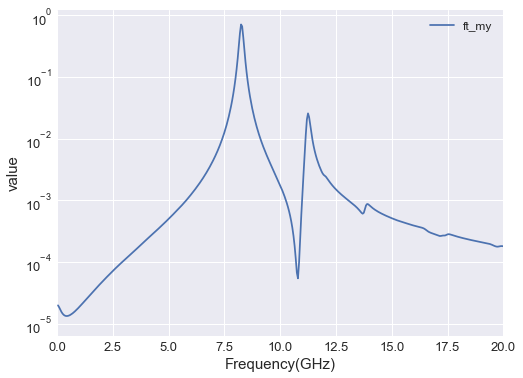

In [67]:
new_table.mpl(y=['ft_my'], xlim=[0, 20e9])
plt.gca().set_yscale('log')

local

In [1]:
import micromagneticdata as mic_d
import numpy as np
import matplotlib.pyplot as plt
import discretisedfield as df
import os
import glob

In [2]:
drive = mic_d.Drive(name='standard_problem', number=3)

In [7]:
drive.m0.array

array([[[[ 5.94859442e+05+0.j,  5.34065059e+05+0.j,
           3.02779916e+04+0.j],
         [ 5.94859443e+05+0.j,  5.34065060e+05+0.j,
          -3.02779702e+04+0.j]],

        [[ 5.68778054e+05+0.j,  5.61982129e+05+0.j,
           2.58381875e+04+0.j],
         [ 5.68778053e+05+0.j,  5.61982130e+05+0.j,
          -2.58381925e+04+0.j]],

        [[ 5.41543847e+05+0.j,  5.88377923e+05+0.j,
           2.32740527e+04+0.j],
         [ 5.41543844e+05+0.j,  5.88377925e+05+0.j,
          -2.32740724e+04+0.j]],

        ...,

        [[ 5.74088133e+05+0.j,  5.56953083e+05+0.j,
           1.50359189e+04+0.j],
         [ 5.74088130e+05+0.j,  5.56953086e+05+0.j,
          -1.50359319e+04+0.j]],

        [[ 6.21836746e+05+0.j,  5.03166100e+05+0.j,
           1.19556367e+04+0.j],
         [ 6.21836746e+05+0.j,  5.03166100e+05+0.j,
          -1.19556453e+04+0.j]],

        [[ 6.63873909e+05+0.j,  4.46373639e+05+0.j,
           4.69120308e+03+0.j],
         [ 6.63873904e+05+0.j,  4.46373647e+05+0.j,


In [3]:
ft_table = drive.table.rfft(y=['mx', 'my', 'mz'])

In [4]:
#def rfft(drive):
time_field = []
for field in drive:
    time_field.append(field.array)
f = np.fft.rfft(time_field, axis=0)

C:\Users\samjr_ym2i32\.conda\envs\ubermagdev\lib\site-packages\numpy\fft\_pocketfft.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


In [6]:
os.mkdir(drive.path+'-ft')
for i in np.arange(f.shape[0]):
    df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]).write(os.path.join(drive.path+'-ft', f'{drive.name}_{ft_table.data["f"].iloc[i]}.omf'))


In [7]:
ft_drive = mic_d.Drive(name=drive.name, number=drive.number, ft=True, table=ft_table, x='f')

In [ ]:
ft_drive[4].real.plane('z').mpl()

In [8]:
s_l = []
for ft_field in ft_drive:
    s_l.append(np.power((np.abs(ft_field)), 2).average)

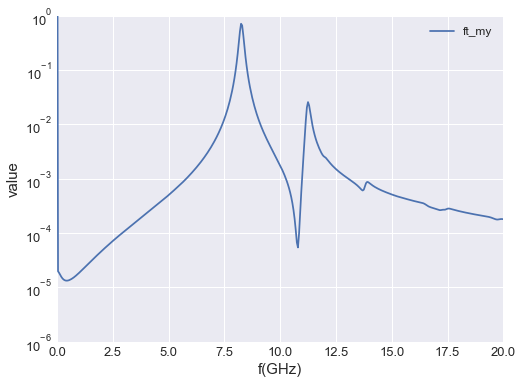

In [34]:
fig, ax = plt.subplots()
ft_drive.table.apply(lambda x: np.abs(x)**2).mpl(y=['ft_my'], xlim=[0, 20e9], ax=ax)
plt.gca().set_ylim([1e-6, 1])
plt.gca().set_yscale('log')

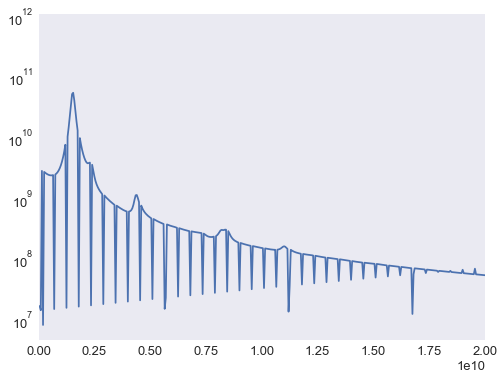

In [10]:
plt.plot(ft_drive.table.data['f'].values[1:], s_l[1:,1])
plt.xlim([0, 20e9])
plt.yscale("log")
# dips could be due to an order issue

In [12]:
def rfft(drive):
    freqs = np.fft.rfftfreq(drive.table.data[drive.x].size, drive.table.dx)
    tot = []
    for i in np.arange(drive.n):
        tot.append(drive[i].array)
    f = np.fft.rfft(tot, axis=0)
    f_field = []
    for i in np.arange(f.shape[0]):
        f_field.append(df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]))
    return freqs, f_field

In [13]:
freqs, out = rfft(drive)

C:\Users\samjr_ym2i32\.conda\envs\ubermagdev\lib\site-packages\numpy\fft\_pocketfft.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


In [14]:
f_field_y = []
for i in np.arange(len(out)):
    f_field_y.append(abs(out[i].y)**2)

In [15]:
s_l = []
for i in np.arange(len(out)):
    a = np.prod(f_field_y[i].mesh.n).astype(float)
    s_l.append((f_field_y[i]/a).average)

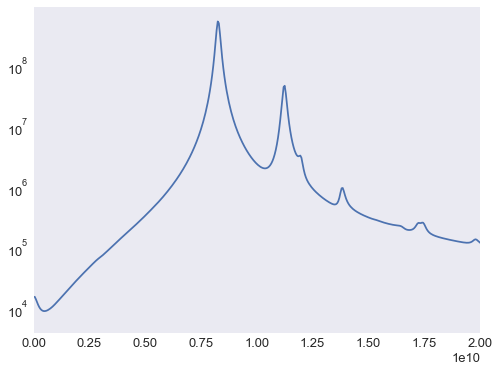

In [19]:
plt.plot(freqs[1:], s_l[1:])
plt.xlim([0,20e9])
plt.yscale('log')

In [ ]:
plt.plot(ft_drive.table.data['f'].values[1:], s_l[1:,1])
plt.xlim([0, 20e9])
plt.yscale("log")